# Milestone 1

------------------------
## Perkenalan
> Bab pengenalan harus diisi dengan identitas, gambaran besar dataset yang digunakan, dan objective yang ingin dicapai.

Name : William Hugo Ravindra Putra

Batch : 11

Dataset : Telco Customer Churn (https://www.kaggle.com/datasets/blastchar/telco-customer-churn)

Objective :
- Mampu memahami konsep Artificial Neural Network.
- Mampu mempersiapkan data untuk digunakan dalam model Artificial Neural Network.
- Mampu mengimplementasikan Artificial Neural Network dengan data yang diberikan.
- Mampu menganalisis dan menjelaskan layer yang dibuat.


------------------------
## Import Libraries
> Cell pertama pada notebook harus berisi dan hanya berisi semua library yang digunakan dalam project.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow import keras
from feature_engine.outliers import Winsorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from tensorflow import math
from tensorflow import data
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTENC
import pickle

------------------------
## Data Loading
> Bagian ini berisi proses penyiapan data sebelum dilakukan eksplorasi data lebih lanjut. Proses Data Loading dapat berupa memberi nama baru untuk setiap kolom, mengecek ukuran dataset, dll.



In [2]:
# Data Loading
df = pd.read_csv('Telco_Data.csv')
# Displaying the data
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


> From the table above, I can see that the data is about the churning rate or customers for a Telecommunnication company. the data shows a range of features from customer ID, Partner, Dependents, Tenure, Internet Service and etc

In [3]:
#Checking the description of the numerical data
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [4]:
# Checking the information on the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


> From the information above, I can spot a few 'weird' or misplaced dtypes. For TotalCharges, it says it is an object but in reality it is a numerical value (int or float), that means I will have to change the dtypes from object to int/float. For Senior Citizen, it says it is an int which is fine, but to quell the confusion I'm going to change it in the form of an object

In [5]:
#Checking for missing values
df.isnull().sum().sum()

0

In [6]:
#Checking for duplicated rows
df.duplicated().sum()

0

In [7]:
#Copying the data to be manipulated
df1 = df.copy()

In [8]:
#Changing the TotalCharges into a numerical dtype
df1['TotalCharges'] = pd.to_numeric(df1['TotalCharges'],errors = 'coerce')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


> By the code above, I can see that TotalCharges has been changed to float64

In [9]:
#Checking all the unique values for categorical data
print('CATEGORICAL: ')
for col in df1:
    if df1[col].dtypes == 'object':
        print(f'{col} = {df1[col].unique()}')

CATEGORICAL: 
customerID = ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender = ['Female' 'Male']
Partner = ['Yes' 'No']
Dependents = ['No' 'Yes']
PhoneService = ['No' 'Yes']
MultipleLines = ['No phone service' 'No' 'Yes']
InternetService = ['DSL' 'Fiber optic' 'No']
OnlineSecurity = ['No' 'Yes' 'No internet service']
OnlineBackup = ['Yes' 'No' 'No internet service']
DeviceProtection = ['No' 'Yes' 'No internet service']
TechSupport = ['No' 'Yes' 'No internet service']
StreamingTV = ['No' 'Yes' 'No internet service']
StreamingMovies = ['No' 'Yes' 'No internet service']
Contract = ['Month-to-month' 'One year' 'Two year']
PaperlessBilling = ['Yes' 'No']
PaymentMethod = ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn = ['No' 'Yes']


> From the information above, I can see that there are multiple columns with useless unique values ('No internet service'), that value can be turned into 'No' and the data would still be the same. So I have decided to change it

In [10]:
#Checking unique value of Senior Citizen
df1['SeniorCitizen'].unique()

array([0, 1], dtype=int64)

> Here I can see that Senior Citizen is in the form a number, although not a problem, I will change it into Categorical just so it's uniformed with the others

In [11]:
#Replacing Values in column senior citizen
df1['SeniorCitizen'].replace(0, 'No', inplace=True)
df1['SeniorCitizen'].replace(1, 'Yes', inplace=True)
#Replacing Values in column Churn
df1['Churn'].replace('No', 0, inplace=True)
df1['Churn'].replace('Yes', 1, inplace=True)

> By the code above, I have successfully changed the values in SeniorCitizen into an object. For column 'Churn' since it is the target and I will be removing it before I do scaling, I will change it into a form of numerical value so as it won't become a problem during the training of models

In [12]:
#Checking the data information
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


> Since I changed all the 'problematic' columns dtypes, I just wanted to make sure it is what I hoped for and it is

In [13]:
#Replacing redundant unique values
df1.replace('No internet service', 'No', inplace=True)
df1.replace('No phone service', 'No', inplace=True)
#Checking all the categorical unique values
for col in df1:
    if df1[col].dtypes == 'object':
        print(f'{col} = {df1[col].unique()}')

customerID = ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender = ['Female' 'Male']
SeniorCitizen = ['No' 'Yes']
Partner = ['Yes' 'No']
Dependents = ['No' 'Yes']
PhoneService = ['No' 'Yes']
MultipleLines = ['No' 'Yes']
InternetService = ['DSL' 'Fiber optic' 'No']
OnlineSecurity = ['No' 'Yes']
OnlineBackup = ['Yes' 'No']
DeviceProtection = ['No' 'Yes']
TechSupport = ['No' 'Yes']
StreamingTV = ['No' 'Yes']
StreamingMovies = ['No' 'Yes']
Contract = ['Month-to-month' 'One year' 'Two year']
PaperlessBilling = ['Yes' 'No']
PaymentMethod = ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


> By the code above, I can see that the replacement has worked and has changed all the redundant unique values

In [14]:
#Dropping column
df1.drop('customerID', axis=1, inplace=True)

> Here I have chosen to drop customerID because it has no use in training of the models since the values it has are all different from another, and is just there to tell it's a different customer

In [15]:
#Checking the columns
df1.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

------------------------
## Exploratory Data Analysis (EDA)
> Bagian ini berisi explorasi data pada dataset diatas dengan menggunakan query, grouping, visualisasi sederhana, dan lain sebagainya.



<AxesSubplot:ylabel='Churn'>

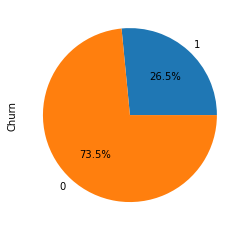

In [16]:
#Checking the ratio of Churnings
df1.Churn.value_counts().sort_values().plot(kind = 'pie', autopct='%1.1f%%')

> From the graph above, I can see that most customers (73%) choose to not churn while 26.5% of them choose to churn. Here even though the data is imbalance, I could use Smote or balancing the data because the ratio of 7:3, but it wouldn't be necessary since the imbalanced data is considered mild. But I will do so anyway

<AxesSubplot:xlabel='TotalCharges', ylabel='Count'>

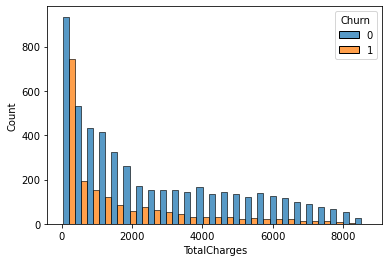

In [17]:
#Visualising Data of TotalCharges by Churn
sns.histplot(x='TotalCharges', hue='Churn', data=df1, multiple="dodge")

> From the graph above, I can see that the most amount of people choose to churn 'yes' if they're given a low amount of TotalCharges. This could mean that they are still new towards the company/services and still hasn't given full commitment towards it

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Count'>

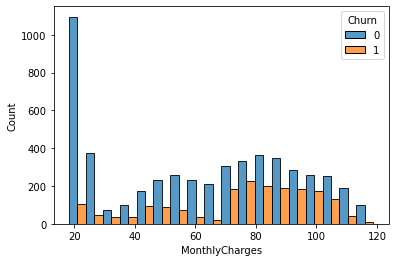

In [18]:
#Visualising Data of MonthlyCharges by Churn
sns.histplot(x='MonthlyCharges', hue='Churn', data=df1, multiple="dodge")

> The graph about TotalCharges tell one story, the graph about MonthlyCharges tell us another. Here I can see that most people/customers start to churn 'yes' if they are given a Monthly Charge above 70. This could mean that they are leaving the services because they have found an alternative with cheaper MonthlyCharges

<AxesSubplot:xlabel='tenure', ylabel='Count'>

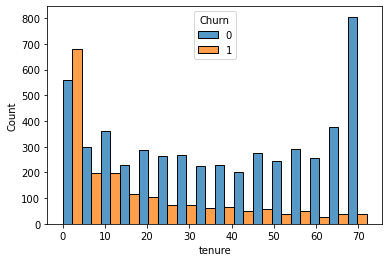

In [19]:
#Visualising Data of tenure by Churn
sns.histplot(x='tenure', hue='Churn', data=df1, multiple="dodge")

> From the graph above, I can see that the less time spent with the services/company the more likely it is for them to churn 'yes'. This makes sense in the real world as they do not have the commitment to stick with one service, while someone with a higher tenure rate will have a feeling of commitment towards the service/company

------------------------
## Data Preprocessing
> Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-dev-test, transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.

### Data Inference

In [20]:
#Get Data for Model Inference
data_inf = df1.sample(10, random_state=27)
#Displaying Model inference
data_inf

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4903,Female,No,No,No,5,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Electronic check,90.80,455.50,1
2695,Male,No,Yes,No,52,Yes,Yes,DSL,Yes,Yes,Yes,Yes,No,Yes,One year,Yes,Credit card (automatic),81.40,4354.45,0
2184,Female,Yes,No,No,2,Yes,Yes,Fiber optic,No,No,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,88.55,179.25,1
6024,Female,No,Yes,No,3,Yes,Yes,Fiber optic,No,Yes,No,No,No,Yes,Month-to-month,Yes,Credit card (automatic),91.50,242.95,1
5861,Male,No,No,No,35,Yes,No,No,No,No,No,No,No,No,Two year,No,Mailed check,19.25,677.90,0
5017,Female,No,Yes,No,41,No,No,DSL,No,Yes,No,Yes,No,No,One year,No,Mailed check,35.45,1391.65,0
4612,Female,No,No,Yes,65,No,No,DSL,No,Yes,No,Yes,Yes,No,Two year,No,Mailed check,45.25,2933.95,0
5475,Male,No,No,Yes,54,Yes,Yes,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Credit card (automatic),55.00,3092.65,1
1737,Female,No,Yes,No,7,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,44.25,313.45,0
4700,Female,No,No,No,2,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,45.85,105.60,0


In [21]:
#Remove Inference Set
df1 = df1.drop(data_inf.index)
#Displaying Inference
df1

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,No,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0
7039,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0
7040,Female,No,Yes,Yes,11,No,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7041,Male,Yes,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,1


In [22]:
#Reset Index
df1.reset_index(drop=True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)
#Displaying Model Inference
data_inf

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,No,No,5,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Electronic check,90.80,455.50,1
1,Male,No,Yes,No,52,Yes,Yes,DSL,Yes,Yes,Yes,Yes,No,Yes,One year,Yes,Credit card (automatic),81.40,4354.45,0
2,Female,Yes,No,No,2,Yes,Yes,Fiber optic,No,No,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,88.55,179.25,1
3,Female,No,Yes,No,3,Yes,Yes,Fiber optic,No,Yes,No,No,No,Yes,Month-to-month,Yes,Credit card (automatic),91.50,242.95,1
4,Male,No,No,No,35,Yes,No,No,No,No,No,No,No,No,Two year,No,Mailed check,19.25,677.90,0
5,Female,No,Yes,No,41,No,No,DSL,No,Yes,No,Yes,No,No,One year,No,Mailed check,35.45,1391.65,0
6,Female,No,No,Yes,65,No,No,DSL,No,Yes,No,Yes,Yes,No,Two year,No,Mailed check,45.25,2933.95,0
7,Male,No,No,Yes,54,Yes,Yes,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Credit card (automatic),55.00,3092.65,1
8,Female,No,Yes,No,7,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,44.25,313.45,0
9,Female,No,No,No,2,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,45.85,105.60,0


### Splitting Dataset

In [23]:
#Split between 'X' (features) and 'y' (target)
X = df1.drop('Churn', axis=1) 
y = df1['Churn']
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,No,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,Male,No,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65


> Here I have split it into features and target to be used in our model training

In [24]:
#Splitting the data into train, test, and valid
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, train_size=0.9, random_state=27)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, train_size=0.8,random_state=27)

> Here I have split the data into 3 different parts train, test and validation. I have done so to have a validation set, so it doesn't solely depend on the train set

In [25]:
#Checking for missing values
print('X_train:', X_train.isnull().sum().sum())
print('y_train:', y_train.isnull().sum().sum())
print('X_test:', X_test.isnull().sum().sum())
print('y_test;', y_test.isnull().sum().sum())
print('X_valid:', X_valid.isnull().sum().sum())
print('y_valid:', y_valid.isnull().sum().sum())

X_train: 5
y_train: 0
X_test: 0
y_test; 0
X_valid: 6
y_valid: 0


> Since I can see there are some missing values, I will have to handle them below. The reason as to why Missing Values came up (eventhough the originla dataset has none) might be because I have changed/modified the data earlier

### Handling Missing Values

In [26]:
#Checking where is the missing values
X_train.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        5
dtype: int64

In [27]:
#Checking where is the missing values
X_test.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [28]:
#Checking where is the missing values
X_valid.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        6
dtype: int64

> From checking where all the missing values are I can see that all of them are from TotalCharges, this makes sense because I have changed/manipulated the data earlier (so it didn't just randomly popped up)

In [29]:
#Checking the Missing Values
X_train[X_train['TotalCharges'].isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
3823,Male,No,Yes,Yes,0,Yes,Yes,No,No,No,No,No,No,No,Two year,No,Mailed check,25.35,NaN
5211,Male,No,Yes,Yes,0,Yes,No,No,No,No,No,No,No,No,One year,Yes,Mailed check,19.70,NaN
936,Female,No,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN
488,Female,No,Yes,Yes,0,No,No,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN
6660,Female,No,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN


In [30]:
#Filling the missing values
X_train.fillna(X_train.median(), inplace=True)
X_test.fillna(X_test.median(), inplace=True)
X_valid.fillna(X_valid.median(), inplace=True)

C:\Users\Hugo\AppData\Local\Temp/ipykernel_17816/836351862.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  X_train.fillna(X_train.median(), inplace=True)
C:\Users\Hugo\AppData\Local\Temp/ipykernel_17816/836351862.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  X_test.fillna(X_test.median(), inplace=True)
C:\Users\Hugo\AppData\Local\Temp/ipykernel_17816/836351862.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  X_valid.fillna(X_valid.median(), inplace=True)


> Here I have chosen to use median to fill up the missing values because TotalCharges was RightSkewed, and one of the ways to handle missing values of Skewed Distribution is to use the median value

In [31]:
#Checking for missing value
print('X_train:', X_train.isnull().sum().sum())
print('y_train:', y_train.isnull().sum().sum())
print('X_test:', X_test.isnull().sum().sum())
print('y_test;', y_test.isnull().sum().sum())
print('X_valid:', X_valid.isnull().sum().sum())
print('y_valid:', y_valid.isnull().sum().sum())

X_train: 0
y_train: 0
X_test: 0
y_test; 0
X_valid: 0
y_valid: 0


> I can see that all the missing values has been dealt with, now moving onto the Outliers

### Handling Outliers

In [32]:
# Looping to check the Distribution of each column
dist_check = X_train_full.skew(numeric_only=True)

normal_dist = []
skew_dist = []
for x in range(len(dist_check)):
    if dist_check.values[x] < -0.5:
        skew_dist.append(dist_check.index[x])
    elif dist_check.values[x] > 0.5:
        skew_dist.append(dist_check.index[x])
    else:
        normal_dist.append(dist_check.index[x])

In [33]:
# Skewed distribution
print('Skewed distribution :', skew_dist)
print("")
# Normal distribution
print('Normal distribution :',normal_dist)

Skewed distribution : ['TotalCharges']

Normal distribution : ['tenure', 'MonthlyCharges']


> Here I have shown the distribution of the data because I wanted to know how to deal with the outliers better

In [34]:
#Making a function to check the outliers of the data with Normal Distributed 
def detect_normal(df, variable):
    
    threshold = 1.5
    mean_ = np.mean(df[variable])
    std_ = np.std(df[variable])

    upper_count = df[
                    ((df[variable]-mean_)/std_) > threshold
                    ][variable].count()

    bottom_count = df[
                    ((df[variable]-mean_)/std_) < -threshold
                    ][variable].count()

    total_count = upper_count + bottom_count

    percentage = (total_count/len(df[variable])*100)

    a = ({'Variable':variable, 'Total Outliers':total_count, 'Percentage':percentage})

    return print(a)

In [35]:
#Checking the outliers in the normal range
print('X_train')
for x in normal_dist:
    detect_normal(X_train, variable=x)

X_train
{'Variable': 'tenure', 'Total Outliers': 478, 'Percentage': 9.441042859964448}
{'Variable': 'MonthlyCharges', 'Total Outliers': 333, 'Percentage': 6.57712818487063}


> From the code above, I can see that the outliers is less than 10% of the total data. There are 2 ways to handle that; first one being to trim it off, and the second being to censor it. Here I have chosen to censor the data because I would like to trim the data if it is less than 5-4% of the total data

In [36]:
#Censoring
windsoriser = Winsorizer(capping_method='gaussian', 
                          tail='both',  #Censor both the right and left end outliers
                          fold=1.5, 
                          variables=['tenure', 'MonthlyCharges'])

windsoriser.fit(X_train)

X_train_cen = windsoriser.transform(X_train)

In [37]:
#Making a function to check the outliers of the data with Skewed Distributed 
def detect_skew(df, variable, distance):
    
    for i in variable:
        
        IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)
        lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
        upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

        upper_boundary_count = df[(df[variable] > upper_boundary)][variable].count()

        lower_boundary_count = df[(df[variable] < lower_boundary)][variable].count()
        
        total_count = upper_boundary_count + lower_boundary_count

        percentage = (total_count/len(df[variable])*100)

        a = ({'Variable':variable, 'Total Outliers':total_count, 'Percentage':percentage})

    return print(a)

In [38]:
#Checking the outliers in the extreme range
for i in skew_dist:
    detect_skew(X_train_cen, variable=i, distance=1.5)

{'Variable': 'TotalCharges', 'Total Outliers': 0, 'Percentage': 0.0}


> Since TotalCharges doesn't have any outliers, I will leave it as it is

### Split

In [39]:
#Getting Numerical and Categorical Column 
num_column = X_train_cen.select_dtypes(include=np.number).columns.tolist()
cat_column = X_train_cen.select_dtypes(include=['object']).columns.tolist()

print('Numerical Columns: ', num_column)
print('Categorical Columns:', cat_column)

Numerical Columns:  ['tenure', 'MonthlyCharges', 'TotalCharges']
Categorical Columns: ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


In [40]:
#Split Train set and Test set based on COlummn type
X_train_num = X_train[num_column]
X_train_cat = X_train[cat_column]

X_valid_num = X_valid[num_column]
X_valid_cat = X_valid[cat_column]

X_test_num = X_test[num_column]
X_test_cat = X_test[cat_column]

### Feature Scaling

In [41]:
scaler = StandardScaler()
X_train_num_scaled = scaler.fit_transform(X_train_num)
X_valid_num_scaled  = scaler.transform(X_valid_num)
X_test_num_scaled  = scaler.transform(X_test_num)
X_train_num_scaled

array([[ 0.59150686,  0.67868654,  0.76729264],
       [ 1.60611522,  0.82779293,  1.84612133],
       [ 1.48436221,  1.29996318,  2.17507042],
       ...,
       [ 1.20027187,  1.68101285,  2.1300098 ],
       [ 0.42916952,  0.70519434,  0.5510717 ],
       [-1.27537253, -0.99793201, -0.98827697]])

> Here I have chosen to use Standard Scaler because the majority of the numerical data are Normally Distributed

### Feature Encoding

In [42]:
#Encoding Catergorical Columns
encoder = OrdinalEncoder()
X_train_cat_enc = encoder.fit_transform(X_train_cat)
X_valid_cat_enc  = encoder.transform(X_valid_cat)
X_test_cat_enc = encoder.transform(X_test_cat)

X_train_cat_enc

array([[0., 0., 1., ..., 0., 1., 2.],
       [0., 0., 1., ..., 2., 0., 1.],
       [1., 0., 0., ..., 1., 1., 0.],
       ...,
       [1., 0., 1., ..., 2., 0., 0.],
       [1., 0., 1., ..., 0., 1., 1.],
       [0., 0., 0., ..., 0., 1., 2.]])

> Here I have chosen to use Ordinal Encoder because the unique values are not as much, and in my opinion doesn't need to be ranked using OneHotEncoder

In [43]:
#Concate Columns
X_train_final = np.concatenate((X_train_num_scaled, X_train_cat_enc), axis=1)
X_valid_final = np.concatenate((X_valid_num_scaled, X_valid_cat_enc), axis=1)
X_test_final = np.concatenate((X_test_num_scaled, X_test_cat_enc), axis=1)

X_train_final

array([[ 0.59150686,  0.67868654,  0.76729264, ...,  0.        ,
         1.        ,  2.        ],
       [ 1.60611522,  0.82779293,  1.84612133, ...,  2.        ,
         0.        ,  1.        ],
       [ 1.48436221,  1.29996318,  2.17507042, ...,  1.        ,
         1.        ,  0.        ],
       ...,
       [ 1.20027187,  1.68101285,  2.1300098 , ...,  2.        ,
         0.        ,  0.        ],
       [ 0.42916952,  0.70519434,  0.5510717 , ...,  0.        ,
         1.        ,  1.        ],
       [-1.27537253, -0.99793201, -0.98827697, ...,  0.        ,
         1.        ,  2.        ]])

In [44]:
#Display as dataframe
X_train_final_df = pd.DataFrame(X_train_final, columns=[num_column+cat_column])
X_valid_final_df = pd.DataFrame(X_valid_final, columns=[num_column+cat_column])
X_test_final_df = pd.DataFrame(X_test_final, columns=[num_column+cat_column])

> I have made the train, valid and test sets into dataframes just incase I want to explore

### Feature Selection

In [45]:
#Checking the Feature importance of each column
fs = RandomForestClassifier()
fs.fit(X_train_final_df, y_train)
feature_scores = pd.Series(fs.feature_importances_, index=X_train_final_df.columns).sort_values(ascending=False)

#Displating the scores
feature_scores

TotalCharges        0.193167
MonthlyCharges      0.191388
tenure              0.159639
Contract            0.085546
PaymentMethod       0.054851
InternetService     0.047492
gender              0.028406
PaperlessBilling    0.027478
TechSupport         0.024979
OnlineSecurity      0.023275
Partner             0.022811
OnlineBackup        0.020733
SeniorCitizen       0.020112
MultipleLines       0.019788
DeviceProtection    0.019461
Dependents          0.018800
StreamingMovies     0.018258
StreamingTV         0.016640
PhoneService        0.007178
dtype: float64

> From the scores above, I can see that nearly every column has an importance of above 1% except for Phone Service with only a 0.5% importance score. With that I will be dropping PhoneService as it has the least amount of importance compared to the others

In [46]:
#Dropping least important feature
X_train_final_df.drop(['PhoneService'], axis=1, inplace=True)
X_valid_final_df.drop(['PhoneService'], axis=1, inplace=True)
X_test_final_df.drop(['PhoneService'], axis=1, inplace=True)

c:\Users\Hugo\anaconda3\lib\site-packages\pandas\core\generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [47]:
#Pipeline for Scaling and Encoding
numeric_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())])
categorical_transformer = Pipeline(steps=[ ("encoder", OrdinalEncoder())])

#Columns to use
num_columns =  ['tenure', 'MonthlyCharges', 'TotalCharges']
cat_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',  'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
                'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

#Combining the Pipelines together
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_columns),
        ("cat", categorical_transformer, cat_columns),
    ])

> Even though I've already done manual preprocessing, I've made it into a pipeline to ease the use incase of deployment. So I'm just utilizing it to see if it work when I do deploy using the train, valid and test set in this notebook

In [48]:
# Preprocess the split dataset
Xtrain = preprocessor.fit_transform(X_train)
X_valid_final = preprocessor.transform(X_valid)
X_test_final = preprocessor.transform(X_test)

# Input Pipeline
train_data = data.Dataset.from_tensor_slices((Xtrain, y_train)).batch(32)
valid_data = data.Dataset.from_tensor_slices((X_valid_final, y_valid)).batch(32)
test_data = data.Dataset.from_tensor_slices((X_test_final, y_test)).batch(32)

> After preprocessing the train, test, and valid sets; I have inputted a pipeline from tensorflow so it's easier to be called

------------------------
## Model Definition
> Bagian ini berisi cell untuk mendefinisikan model. Jelaskan alasan menggunakan suatu algoritma/model, hyperparameter yang dipakai, jenis penggunaan metrics yang dipakai, dan hal lain yang terkait dengan model.

### Sequential

In [49]:
#Defining the model
model_seq = keras.models.Sequential([
    keras.layers.Dense(64,input_shape=[len(X_train_final_df.columns)],activation='relu'),
    keras.layers.Dense(32, activation="relu", kernel_regularizer='l2'),
    keras.layers.Dense(16, activation="relu", kernel_regularizer='l2'),
    keras.layers.Dense(1, activation="sigmoid", kernel_regularizer='l2')
])
model_seq.compile(loss="binary_crossentropy", optimizer='Adam', metrics='accuracy')

> - Here I have chosen to use nodes in the form of bits because there is not really a clear/standard number to use so I resorted to using bits as to ease my number picking. 
> - I have chosen to use 'relu' activation method for my input and hidden layers because it is the most popular amount the rest of the activition methods. I have also tried using 'tanh' but for scores didn't go up by much and for the balanced data for sequential API, I got an exploding gradient
> - I have chosen to use 'l2' for the regularizers because other regulizers I made my accuracy drop as well as make my graph more overfit (for the balanced data)
> - For the output layer, I have used sigmoid because when dealing with only 2 classifications for the 2 target, the best/commonly used one to use is sigmoid. 
> - For the optimizer I have used Adam because it is the most popular one

### Functional

In [50]:
#Defining the model
input_ = keras.layers.Input(shape=[len(X_train_final_df.columns)])
hidden1 = keras.layers.Dense(64, activation="relu", kernel_regularizer='l2')(input_)
hidden2 = keras.layers.Dense(32, activation="relu", kernel_regularizer='l2')(hidden1)
hidden3 = keras.layers.Dense(16, activation="relu", kernel_regularizer='l2')(hidden2)
concat = keras.layers.concatenate([input_, hidden2, hidden3])
output = keras.layers.Dense(1, activation="sigmoid", kernel_regularizer='l2')(concat)
model_fun = keras.models.Model(inputs=[input_], outputs=[output])

model_fun.compile(loss="binary_crossentropy", optimizer='Adam', metrics='accuracy')

> For the parameters I have used the same as the Sequential API

------------------------
## Model Training
> Cell pada bagian ini hanya berisi code untuk melatih model dan output yang dihasilkan. Lakukan beberapa kali proses training dengan hyperparameter yang berbeda untuk melihat hasil yang didapatkan. Analisis dan narasikan hasil ini pada bagian Model Evaluation.

### Sequential

In [51]:
#Checking the model summary
model_seq.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1216      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 3,841
Trainable params: 3,841
Non-trainable params: 0
_________________________________________________________________


> Here I can see how many params are used for the model, with a total of 3 841 parameters

In [52]:
#Training the model
history_seq = model_seq.fit(train_data, 
                            epochs=45,
                            validation_data=valid_data,
                            verbose=1)

Epoch 1/45
159/159 [==============================] - 1s 2ms/step - loss: 0.9043 - accuracy: 0.7577 - val_loss: 0.6766 - val_accuracy: 0.7915
Epoch 2/45
159/159 [==============================] - 0s 2ms/step - loss: 0.5884 - accuracy: 0.7908 - val_loss: 0.5438 - val_accuracy: 0.7946
Epoch 3/45
159/159 [==============================] - 0s 2ms/step - loss: 0.5102 - accuracy: 0.7940 - val_loss: 0.5025 - val_accuracy: 0.7938
Epoch 4/45
159/159 [==============================] - 0s 2ms/step - loss: 0.4828 - accuracy: 0.7958 - val_loss: 0.4853 - val_accuracy: 0.7938
Epoch 5/45
159/159 [==============================] - 0s 1ms/step - loss: 0.4704 - accuracy: 0.7968 - val_loss: 0.4767 - val_accuracy: 0.7954
Epoch 6/45
159/159 [==============================] - 0s 2ms/step - loss: 0.4637 - accuracy: 0.7966 - val_loss: 0.4717 - val_accuracy: 0.7970
Epoch 7/45
159/159 [==============================] - 0s 2ms/step - loss: 0.4595 - accuracy: 0.7981 - val_loss: 0.4684 - val_accuracy: 0.7970
Epoch 

> Here with using the pipeline for tensorflow, I am able to get an end accuracy of 81% and a loss of 43% while val_accuracy got 79% and val_loss got 45%

> Here I have chosen to use 45 epoch because the normal range is 1-100, and since I am using 2 different models/API, I have chosen an epoch below the average/mean

> After training the models about 45 times, the model was able to predict the data 80% correctly

> By checking the loss, I can say that the data shouldn't have any exploding or vanishing gradient as well as any overfitting/underfitting data

### Functional

In [53]:
#Checking the model summary
model_fun.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 18)]         0           []                               
                                                                                                  
 dense_4 (Dense)                (None, 64)           1216        ['input_1[0][0]']                
                                                                                                  
 dense_5 (Dense)                (None, 32)           2080        ['dense_4[0][0]']                
                                                                                                  
 dense_6 (Dense)                (None, 16)           528         ['dense_5[0][0]']                
                                                                                              

> Here I can see how many params are used for the model, with a total of 3 891 parameters. An increase of 50 parameters from Sequential API

In [54]:
#Training the model
history_fun = model_fun.fit(train_data, 
                            epochs=45,
                            validation_data=valid_data,
                            verbose=1)

Epoch 1/45
159/159 [==============================] - 1s 2ms/step - loss: 1.0186 - accuracy: 0.7612 - val_loss: 0.7239 - val_accuracy: 0.7938
Epoch 2/45
159/159 [==============================] - 0s 2ms/step - loss: 0.6174 - accuracy: 0.7906 - val_loss: 0.5561 - val_accuracy: 0.7962
Epoch 3/45
159/159 [==============================] - 0s 2ms/step - loss: 0.5255 - accuracy: 0.7942 - val_loss: 0.5108 - val_accuracy: 0.7978
Epoch 4/45
159/159 [==============================] - 0s 2ms/step - loss: 0.4976 - accuracy: 0.7938 - val_loss: 0.4938 - val_accuracy: 0.7962
Epoch 5/45
159/159 [==============================] - 0s 2ms/step - loss: 0.4856 - accuracy: 0.7940 - val_loss: 0.4850 - val_accuracy: 0.7962
Epoch 6/45
159/159 [==============================] - 0s 2ms/step - loss: 0.4789 - accuracy: 0.7952 - val_loss: 0.4796 - val_accuracy: 0.7930
Epoch 7/45
159/159 [==============================] - 0s 2ms/step - loss: 0.4746 - accuracy: 0.7958 - val_loss: 0.4757 - val_accuracy: 0.7946
Epoch 

> Here with using the pipeline for tensorflow, I am able to get an end accuracy of 79% and a loss of 44% while val_accuracy got 79% and val_loss got 45%

> After training the models about 45 times, the model was able to predict the data 79% correctly

> By checking the loss, I can say that the data shouldn't have any exploding or vanishing gradient as well as any overfitting/underfitting data. By checking the loss, it also should be better than Sequential API

---------------------------------
## Model Definition Balanced

In [55]:
#Creating balanced dataset
smotenc= SMOTENC(sampling_strategy='minority', categorical_features=[0,1,2,3,5,6,7,8,9,10,11,12,13,14,15,16])
X_train_bal, y_train_bal = smotenc.fit_resample(X_train_final_df, y_train)
X_valid_bal, y_valid_bal = smotenc.fit_resample(X_valid_final_df, y_valid)
X_test_bal, y_test_bal = smotenc.fit_resample(X_test_final_df, y_test)

In [56]:
#Checking the balance ratio
y_train_bal.value_counts()

1    3713
0    3713
Name: Churn, dtype: int64

> By the count above, I can see that the data is balanced

## Model Training Balanced

### Sequential

In [57]:
#Training the model
history_seq_b = model_seq.fit(X_train_bal, y_train_bal,
                            epochs=45,
                            validation_data=(X_valid_bal, y_valid_bal),
                            verbose=1)

Epoch 1/45
233/233 [==============================] - 1s 3ms/step - loss: 0.4618 - accuracy: 0.7992 - val_loss: 0.4551 - val_accuracy: 0.7980
Epoch 2/45
233/233 [==============================] - 0s 2ms/step - loss: 0.4536 - accuracy: 0.8002 - val_loss: 0.4594 - val_accuracy: 0.7996
Epoch 3/45
233/233 [==============================] - 0s 2ms/step - loss: 0.4516 - accuracy: 0.8010 - val_loss: 0.4544 - val_accuracy: 0.7926
Epoch 4/45
233/233 [==============================] - 0s 2ms/step - loss: 0.4491 - accuracy: 0.8004 - val_loss: 0.4522 - val_accuracy: 0.7936
Epoch 5/45
233/233 [==============================] - 0s 2ms/step - loss: 0.4491 - accuracy: 0.8023 - val_loss: 0.4574 - val_accuracy: 0.7953
Epoch 6/45
233/233 [==============================] - 0s 2ms/step - loss: 0.4469 - accuracy: 0.8051 - val_loss: 0.4534 - val_accuracy: 0.7926
Epoch 7/45
233/233 [==============================] - 0s 2ms/step - loss: 0.4440 - accuracy: 0.8074 - val_loss: 0.4555 - val_accuracy: 0.8001
Epoch 

> By the code above, I can see that the balanced data has performed better than the imbalanced data by a few percent

### Functional

In [58]:
history_fun_b = model_fun.fit(X_train_bal, y_train_bal,
                            epochs=45,
                            validation_data=(X_valid_bal, y_valid_bal),
                            verbose=1)

Epoch 1/45
233/233 [==============================] - 1s 3ms/step - loss: 0.4868 - accuracy: 0.7777 - val_loss: 0.4670 - val_accuracy: 0.7872
Epoch 2/45
233/233 [==============================] - 0s 2ms/step - loss: 0.4793 - accuracy: 0.7847 - val_loss: 0.4662 - val_accuracy: 0.7904
Epoch 3/45
233/233 [==============================] - 0s 2ms/step - loss: 0.4787 - accuracy: 0.7832 - val_loss: 0.4641 - val_accuracy: 0.7888
Epoch 4/45
233/233 [==============================] - 0s 2ms/step - loss: 0.4784 - accuracy: 0.7847 - val_loss: 0.4637 - val_accuracy: 0.7883
Epoch 5/45
233/233 [==============================] - 0s 2ms/step - loss: 0.4781 - accuracy: 0.7832 - val_loss: 0.4646 - val_accuracy: 0.7915
Epoch 6/45
233/233 [==============================] - 0s 2ms/step - loss: 0.4781 - accuracy: 0.7832 - val_loss: 0.4650 - val_accuracy: 0.7909
Epoch 7/45
233/233 [==============================] - 0s 2ms/step - loss: 0.4781 - accuracy: 0.7849 - val_loss: 0.4639 - val_accuracy: 0.7915
Epoch 

> By the code above, I can see that the balanced data has performed slightly worse or identical than the imbalanced data

------------------------
## Model Evaluation
> Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan bagaimana performa model berdasarkan metrics yang dipilih. Hal ini harus dibuktikan dengan visualisasi tren performa dan/atau tingkat kesalahan model. Lakukan analisis terkait dengan hasil pada model dan tuliskan hasil analisisnya.

### Sequential imbalanced

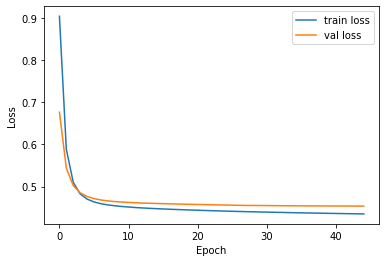

In [59]:
#Visualising the training and validation loss
fig, ax = plt.subplots()
ax.plot(range(45),history_seq.history['loss'],label='train loss')
ax.plot(range(45),history_seq.history['val_loss'],label='val loss')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
plt.legend()

> By the graph above, I can see that the data is considered good fit. After many improvements towards the models, I have finally gotten a model with a good fit

In [60]:
#Evaluating the models
model_seq.evaluate(test_data)

22/22 [==============================] - 0s 1ms/step - loss: 0.5162 - accuracy: 0.7557


[0.5162336826324463, 0.7556818127632141]

> Here after evaluating the test dataset, I got an accuracy of 80% and a loss of 42% which is similar to the train and valid dataset, which is slightly better than the train set above (in terms of loss)

In [61]:
#Predicting the testset
y_pred_test_s = model_seq.predict(test_data)
y_pred_s = y_pred_test_s.round()

22/22 [==============================] - 0s 911us/step


Text(33.0, 0.5, 'Actual')

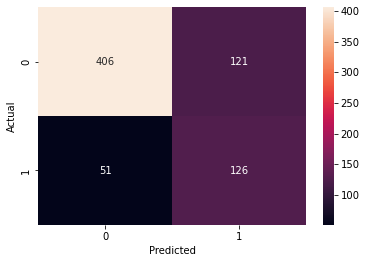

In [62]:
#Visualising the prediction for the testset
cm = math.confusion_matrix(labels=y_test,predictions=y_pred_s)

sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

> With the confusion matrix, I can see that the model predicted 1 ('Yes') 101 times when the answer was suppose to be 0 ('No'). Here the model predicted Churn 'No' correctly 82% of the time and Churn 'Yes' correctly 73%, the lower prediction rate for Churn 'Yes' could be attributed to the imbalanced data

In [63]:
print("Classification Reports is:\n",classification_report(y_test, y_pred_s))

Classification Reports is:
               precision    recall  f1-score   support

           0       0.89      0.77      0.83       527
           1       0.51      0.71      0.59       177

    accuracy                           0.76       704
   macro avg       0.70      0.74      0.71       704
weighted avg       0.79      0.76      0.77       704



> For the classification report, I can see that it has underperformed in the 1 prediction. Which makes sense because the data had a majority of it in 0

### Sequential Balance

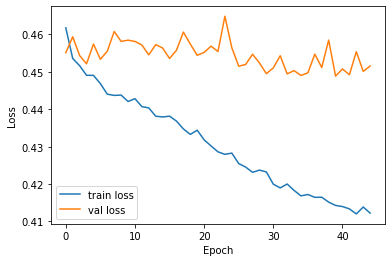

In [64]:
#Visualising the training and validation loss
fig, ax = plt.subplots()
ax.plot(range(45),history_seq_b.history['loss'],label='train loss')
ax.plot(range(45),history_seq_b.history['val_loss'],label='val loss')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
plt.legend()

> Eventhough the data had better prediction scores, it seems to be overfit

In [65]:
#Evaluating the models
model_seq.evaluate(X_test_bal, y_test_bal)

33/33 [==============================] - 0s 1ms/step - loss: 0.4365 - accuracy: 0.8188


[0.4364619255065918, 0.8187856078147888]

> As I said, it has performed better than the imbalanced data

In [66]:
#Predicting the testset
y_pred_test_sb = model_seq.predict(X_test_bal)
y_pred_sb = y_pred_test_sb.round()

33/33 [==============================] - 0s 1ms/step


Text(33.0, 0.5, 'Actual')

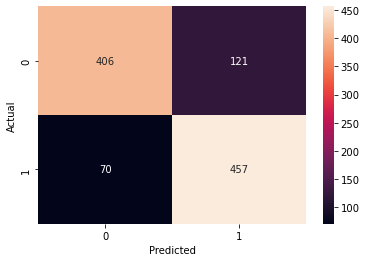

In [67]:
#Visualising the prediction for the testset
cm = math.confusion_matrix(labels=y_test_bal,predictions=y_pred_sb)

sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

> Here I can see that the model predicted Churn 'No' 80% correctly, while Churn 'Yes' got 82% correctly. The largest improvement is in the 'Yes' prediction, as the dataset is balanced it is able to learn the 'Yes' option even more, this making the prediction score increase

In [68]:
print("Classification Reports is:\n",classification_report(y_test_bal, y_pred_sb))

Classification Reports is:
               precision    recall  f1-score   support

           0       0.85      0.77      0.81       527
           1       0.79      0.87      0.83       527

    accuracy                           0.82      1054
   macro avg       0.82      0.82      0.82      1054
weighted avg       0.82      0.82      0.82      1054



> The classification report has vastly been improved, this could be attributed to the balancing of the data

### Functional

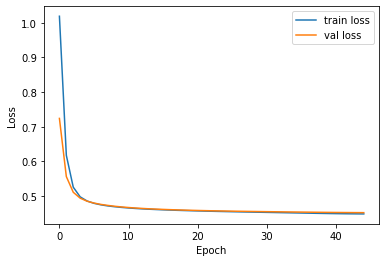

In [69]:
#Visualising the training and validation loss
fig, ax = plt.subplots()
ax.plot(range(45),history_fun.history['loss'],label='train loss')
ax.plot(range(45),history_fun.history['val_loss'],label='val loss')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
plt.legend()

> By the graph above, I can see that the data is considered good fit and it seems it's a better fit compared to Sequential API. After many improvements towards the models, I have finally gotten a model with a good fit (it used to have exploding gradients)

In [70]:
#Evaluating the models
model_fun.evaluate(test_data)

22/22 [==============================] - 0s 1ms/step - loss: 0.5017 - accuracy: 0.7599


[0.5016780495643616, 0.7599431872367859]

> Here after evaluating the test dataset, I got an accuracy of 80% and a loss of 42% which is slightly better to the train and valid dataset, in terms of loss and accuracy

In [71]:
#Predicting the testset
y_pred_test_f = model_fun.predict(test_data)
y_pred_f = y_pred_test_f.round()

22/22 [==============================] - 0s 1ms/step


Text(33.0, 0.5, 'Actual')

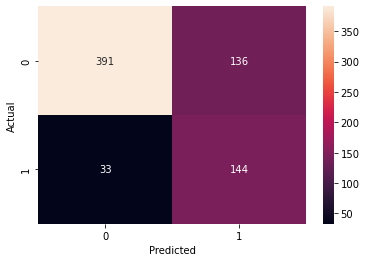

In [72]:
#Visualising the prediction for the testset
cm = math.confusion_matrix(labels=y_test,predictions=y_pred_f)

sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

> With the confusion matrix, I can see that the model predicted 1 ('Yes') 101 times when the answer was suppose to be 0 ('No'). Here the model predicted Churn 'No' correctly 83% of the time and Churn 'Yes' correctly 80%, I still think the lower prediction rate for Churn 'Yes' could be attributed to the imbalanced data

In [73]:
print("Classification Reports is:\n",classification_report(y_test, y_pred_f))

Classification Reports is:
               precision    recall  f1-score   support

           0       0.92      0.74      0.82       527
           1       0.51      0.81      0.63       177

    accuracy                           0.76       704
   macro avg       0.72      0.78      0.73       704
weighted avg       0.82      0.76      0.77       704



> For the classification report, I can see that it has underperformed in the 1 prediction. Which makes sense because the data had a majority of it in 0

### Functional Balance

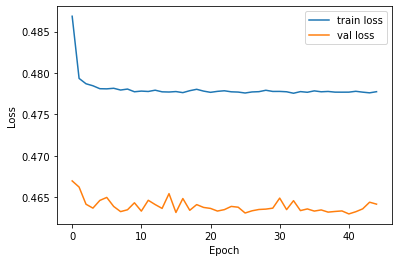

In [74]:
#Visualising the training and validation loss
fig, ax = plt.subplots()
ax.plot(range(45),history_fun_b.history['loss'],label='train loss')
ax.plot(range(45),history_fun_b.history['val_loss'],label='val loss')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
plt.legend()

> By the graph above, I can see that the model is overfit. Since it is too separated to be called goodfit

In [75]:
#Evaluating the models
model_fun.evaluate(X_test_bal, y_test_bal)

33/33 [==============================] - 0s 1ms/step - loss: 0.4541 - accuracy: 0.8159


[0.4541170597076416, 0.8159393072128296]

In [76]:
#Predicting the testset
y_pred_test_fb = model_fun.predict(X_test_bal)
y_pred_fb = y_pred_test_fb.round()

33/33 [==============================] - 0s 972us/step


Text(33.0, 0.5, 'Actual')

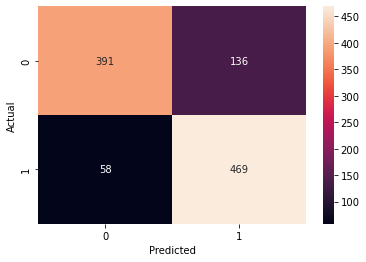

In [77]:
#Visualising the prediction for the testset
cm = math.confusion_matrix(labels=y_test_bal,predictions=y_pred_fb)

sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

> Here I can see that the model predicted Churn 'No' 81% correctly, while Churn 'Yes' got 77% correctly. The largest improvement is in the 'Yes' prediction, as the dataset is balanced it is able to learn the 'Yes' option even more, this making the prediction score increase

In [78]:
print("Classification Reports is:\n",classification_report(y_test_bal, y_pred_fb))

Classification Reports is:
               precision    recall  f1-score   support

           0       0.87      0.74      0.80       527
           1       0.78      0.89      0.83       527

    accuracy                           0.82      1054
   macro avg       0.82      0.82      0.81      1054
weighted avg       0.82      0.82      0.81      1054



> Here the classification report has improved because the data is balanced, with an average of 80% above

------------------------
## Model Saving
> Dengan melihat hasil evaluasi model, pilihlah model terbaik untuk disimpan. Model terbaik ini akan digunakan kembali dalam melakukan deployment di Heroku.

In [79]:
#Saving the joined pipeline
with open('pipe.pkl', 'wb') as file1:
    pickle.dump(preprocessor, file1)

In [80]:
#Saving the models
model_seq.save("my_model_seq.h5")
model_fun.save("my_model_fun.h5")

## Model Loading

In [81]:
#Loading the models
model_s = keras.models.load_model("my_model_seq.h5")
model_f = keras.models.load_model("my_model_fun.h5")

In [82]:
#Loading the pipeline
with open('pipe.pkl', 'rb') as file1:
    pipe = pickle.load(file1)

------------------------
## Model Inference
> Model yang sudah dilatih akan dicoba pada data yang bukan termasuk ke dalam train-set ataupun test-set. Data ini harus dalam format yang asli, bukan data yang sudah di-scaled.

In [83]:
#Display data_inf
data_inf

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,No,No,5,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Electronic check,90.80,455.50,1
1,Male,No,Yes,No,52,Yes,Yes,DSL,Yes,Yes,Yes,Yes,No,Yes,One year,Yes,Credit card (automatic),81.40,4354.45,0
2,Female,Yes,No,No,2,Yes,Yes,Fiber optic,No,No,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,88.55,179.25,1
3,Female,No,Yes,No,3,Yes,Yes,Fiber optic,No,Yes,No,No,No,Yes,Month-to-month,Yes,Credit card (automatic),91.50,242.95,1
4,Male,No,No,No,35,Yes,No,No,No,No,No,No,No,No,Two year,No,Mailed check,19.25,677.90,0
5,Female,No,Yes,No,41,No,No,DSL,No,Yes,No,Yes,No,No,One year,No,Mailed check,35.45,1391.65,0
6,Female,No,No,Yes,65,No,No,DSL,No,Yes,No,Yes,Yes,No,Two year,No,Mailed check,45.25,2933.95,0
7,Male,No,No,Yes,54,Yes,Yes,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Credit card (automatic),55.00,3092.65,1
8,Female,No,Yes,No,7,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,44.25,313.45,0
9,Female,No,No,No,2,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,45.85,105.60,0


In [84]:
data_inf_red = data_inf.drop('PhoneService', axis=1)

In [85]:
data_piped = pipe.fit_transform(data_inf_red)
data_piped

array([[-0.89950042,  1.25110122, -0.63374279,  0.        ,  0.        ,
         0.        ,  0.        ,  1.        ,  1.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  1.        ,  1.        ],
       [ 1.05774586,  0.87258975,  2.05428743,  1.        ,  0.        ,
         1.        ,  0.        ,  1.        ,  0.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  0.        ,  1.        ,
         1.        ,  1.        ,  0.        ],
       [-1.02443103,  1.16050007, -0.82419621,  0.        ,  1.        ,
         0.        ,  0.        ,  1.        ,  1.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  1.        ,  1.        ],
       [-0.98278749,  1.27928825, -0.78027989,  0.        ,  0.        ,
         1.        ,  0.        ,  1.        ,  1.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.   

In [86]:
data_inf_final_df = pd.DataFrame(data_piped, columns=[num_columns+cat_columns])
data_inf_final_df

,tenure,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,-0.899500,1.251101,-0.633743,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
1,1.057746,0.872590,2.054287,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0
2,-1.024431,1.160500,-0.824196,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0
3,-0.982787,1.279288,-0.780280,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.349806,-1.630015,-0.480415,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0
5,0.599667,-0.977687,0.011662,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0
6,1.599112,-0.583069,1.074960,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,2.0,0.0,2.0
7,1.141033,-0.190464,1.184372,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8,-0.816213,-0.623336,-0.731675,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
9,-1.024431,-0.558908,-0.874972,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0


In [87]:
#Predict Data Inference
y_pred_inf = model_f.predict(data_inf_final_df)
y_pred_inf = y_pred_inf.round()

1/1 [==============================] - 0s 46ms/step


In [88]:
#Convert into DataFrame
y_pred_inf_df = pd.DataFrame(y_pred_inf, columns=['Churn Prediction'])
y_pred_inf_df

,Churn Prediction
0,1.0
1,0.0
2,1.0
3,1.0
4,0.0
5,0.0
6,0.0
7,0.0
8,1.0
9,1.0


In [89]:
#Merge
pd.concat([data_inf, y_pred_inf_df], axis=1)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn Prediction
0,Female,No,No,No,5,Yes,Yes,Fiber optic,No,Yes,...,No,Yes,No,Month-to-month,Yes,Electronic check,90.80,455.50,1,1.0
1,Male,No,Yes,No,52,Yes,Yes,DSL,Yes,Yes,...,Yes,No,Yes,One year,Yes,Credit card (automatic),81.40,4354.45,0,0.0
2,Female,Yes,No,No,2,Yes,Yes,Fiber optic,No,No,...,No,No,Yes,Month-to-month,Yes,Electronic check,88.55,179.25,1,1.0
3,Female,No,Yes,No,3,Yes,Yes,Fiber optic,No,Yes,...,No,No,Yes,Month-to-month,Yes,Credit card (automatic),91.50,242.95,1,1.0
4,Male,No,No,No,35,Yes,No,No,No,No,...,No,No,No,Two year,No,Mailed check,19.25,677.90,0,0.0
5,Female,No,Yes,No,41,No,No,DSL,No,Yes,...,Yes,No,No,One year,No,Mailed check,35.45,1391.65,0,0.0
6,Female,No,No,Yes,65,No,No,DSL,No,Yes,...,Yes,Yes,No,Two year,No,Mailed check,45.25,2933.95,0,0.0
7,Male,No,No,Yes,54,Yes,Yes,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Credit card (automatic),55.00,3092.65,1,0.0
8,Female,No,Yes,No,7,Yes,No,DSL,No,No,...,No,No,No,Month-to-month,Yes,Mailed check,44.25,313.45,0,1.0
9,Female,No,No,No,2,Yes,No,DSL,No,No,...,No,No,No,Month-to-month,Yes,Mailed check,45.85,105.60,0,1.0


> After using the models trained and used above, I can see that it was able to predict the model/data inference 90% correctly, with the only incorrect answer in index 7 which is a Churn 'Yes'. Once again it could be attributed to the imbalance data of Churn 'NO, YES'

------------------------
## Pengambilan Kesimpulan
> Pada bagian terakhir ini, harus berisi kesimpulan yang mencerminkan hasil yang didapat dengan objective yang sudah ditulis di bagian pengenalan.

The conclusion for this Milestone is:
- Models/API used for the prediction are Sequential and Functional API
> While both APIs have done rather well, the Functional API has come out ontop in terms of prediction rate and also in terms of 'goodfit'. This could be because Functional API is slightly more complex and modifiable for the user

> If considering the API with the balanced data, I can see that it has done better in terms of prediction rate but when it comes to the 'fit', it has done terribly with both API val and train loss lines not intersecting with one another, making it to be massively overfit
- Models could be improved upon more
> The models I have set are not perfect, someone else could possibly get an accuracy of over 80% with different parameters set. In terms of finding the right parameters, I have chosen to do so manually instead of resorting to GridSearchCV and/or RandomSearchCV. I have done so just to be familiar with what each parameters will do, with LOTS of trial and error, I have a better understanding on it. An example was when I didn't use regulisers the Sequential API was overfit, while the Functional API had an exploding gradient

> Another example was that by using reguliser = 'l1', the scoring for imbalanced was slightly worse by about 1% but the balanced datas graph was significantly better (with the lines actually connecting and not as overfit) and the scoring similar to reguliser = 'l2'
- Which to use for deployment?
> Since the Functional API got better scores in basically everything, I have used it for the data inference and will use it for deployment as well
- The data of Churn Rate is imbalanced
> Since the imbalance rate was only 7:3 which is considered mildly imbalanced, it is necessary if the imbalance rate is in the extreme 9:1. Most datasets are usually imbalance and is very hard to come across a natural 1:1 balance rate, I have chosen to use SMOTE to see if I could increase the scoring of the prediction. Which it did but at the cost of overfitting (based on the graph). Since there is a chance of overfitting, I have chosen to use the method without balancing the data for the model inference and deployment. I'm okay with doing it because the score of the balanced data only increased by a few percentages
- Not all data columns was needed for the prediction
> All the columns do have a correaltion/importance towards the Churning rate, but since Phone Service has the least amount of importance with about 0.05% compared to the others with an importance of over 1%, that's why I have chosen to drop Phone Service. I could've removed more features, but I chose to remove the lowest importance compared tp the others

----------------
## References
- https://seaborn.pydata.org/generated/seaborn.histplot.html
- https://www.kaggle.com/code/mishraay/customer-churn-and-imbalanced-using-keras-ann
- https://python-bloggers.com/2022/03/installing-python-and-tensorflow-with-jupyter-notebook-configurations/
- https://scikit-learn.org/stable/auto_examples/compose/plot_column_transformer_mixed_types.html
- https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/guide/data.ipynb?hl=ko-KR#scrollTo=9Qo3HgDjbDcI